# Independent Validation

In this notebook, I will perform independent validation of my Graph Convolution Network based model. 

I validate my model and consequently the biomarkers I produce using the model on the TCGA BRCA multi-omics data set using the following three methods:
1. Generate biomarkers from both the data sets (TCGA BRCA & METABRIC) separately and then compare them
2. Train the model on TCGA BRCA data and then validate on METABRIC data
3. Train and test on METABRIC data but with only features selected from the TCGA BRCA data
4. Train the model on TCGA BRCA data, impute the other omics data for METABRIC data using TCGA BRCA, and then validate on the the imputed data

## Section 1: Biomarker comparison

In this section, we will generate biomarkers using our model and LIME on both the data sets and then compare the biomarker sets.

In [1]:
# Loading necessary libraries and functions
import sys
sys.path.append('../')
from main import train_model
import pandas as pd
import numpy as np

In [2]:
# Setting all variables for run
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = 42 

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

COMBINER = False 
doSMOTE = True 

# Training parameters
num_epoch = 850
test_interval = 50
lr = 5e-4
weight_decay = 1e-3
dropout = 0.25
adj_parameter = 8 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
REPEATS = 1 #Integer, how many times to independently train the model
feature_extract = ["lime"]

### TCGA BRCA

In [3]:
RUN_TITLE = "TCGA BRCA mRNA Expression"
RUN_TITLE_SHORT = "tcga_brca_mrna"

# pre-processed data
mrna = "../R/TCGA BRCA/mrna_top1000.csv"
meta_csv = "../R/TCGA BRCA/PAM50_subtype.csv"
trte_partition_file = "../R/TCGA BRCA/trte_partition.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [4]:
losses_tcga, metrics_tcga, feature_imp_tcga, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

losses_tcga.to_csv("losses_tcga.csv")
metrics_tcga.to_csv("metrics_tcga.csv")
feature_imp_tcga["lime"].to_csv("tcga_features.csv", index_label="features")

2021-04-19 21:04:45.596722 

TCGA BRCA mRNA Expression
SEED =  42


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)



Training...

Test: Epoch 0
Train Accuracy: 0.1770   Test ACC: 0.4837
Train F1: 0.1286         Test F1: 0.3154

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0191              0.1359              0.0000
Basal 	           0.2000              0.4306              0.1522              0.0000
Her2 	           0.2000              0.0957              0.0543              0.0000
LumA 	           0.2000              0.0000              0.4837              1.0000
LumB 	           0.2000              0.3397              0.1739              0.0000


Test: Epoch 50
Train Accuracy: 0.6153   Test ACC: 0.4457
Train F1: 0.6063         Test F1: 0.3306

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------


### METABRIC

In [5]:
RUN_TITLE = "METABRIC mRNA Expression"
RUN_TITLE_SHORT = "metabric_mrna"

# pre-processed data
mrna = "../R/METABRIC/metabric_top1000.csv"
meta_csv = "../R/METABRIC/PAM50_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_metabric.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [6]:
losses_metabric, metrics_metabric, feature_imp_metabric, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

losses_metabric.to_csv("losses_metabric.csv")
metrics_metabric.to_csv("metrics_metabric.csv")
feature_imp_metabric["lime"].to_csv("metabric_features.csv", index_label="features")

2021-04-22 04:25:24.475659 

METABRIC mRNA Expression
SEED =  42

Training...

Test: Epoch 0
Train Accuracy: 0.1790   Test ACC: 0.2563
Train F1: 0.1319         Test F1: 0.1049

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0172              0.1508              0.0000
Basal 	           0.2000              0.5558              0.2141              0.0000
Her2 	           0.2000              0.0794              0.1538              0.0000
LumA 	           0.2000              0.0365              0.2563              1.0000
LumB 	           0.2000              0.2060              0.2251              0.0000


Test: Epoch 50
Train Accuracy: 0.8382   Test ACC: 0.7256
Train F1: 0.8388         Test F1: 0.7269

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
--------------------------

### Comparing Biomarkers

In [2]:
tcga = pd.read_csv("tcga_features.csv")
metabric = pd.read_csv("metabric_features.csv")

# Small modifications
tcga = tcga.rename(columns = {"aggregate": "TCGA"})
metabric = metabric.rename(columns = {"aggregate": "METABRIC"})

# Removing gene ids from TCGA features column
tcga = tcga.assign(features = [x.split("|")[1] for x in tcga["features"]])

# Converting Entrez IDs from int64 to str
tcga["features"] = tcga["features"].apply(str)
metabric["features"] = metabric["features"].apply(str)

# Common biomarkers (out of the thousand each)
common = tcga.merge(metabric, how = "inner", on = "features")

In [3]:
# Intersection of the 1000 best features selected
print("Number of features independently selected in TCGA =", tcga.shape[0])
print("Number of features independently selected in METABRIC =", metabric.shape[0])
print("Number of common features in the two sets =", common.shape[0])

Number of features independently selected in TCGA = 1000
Number of features independently selected in METABRIC = 1000
Number of common features in the two sets = 94


In [18]:
# Is this overlap significant?
q = common.shape[0]         # Size of the overlap
m = tcga.shape[0] - 47      # Number of genes selected in TCGA - genes not present in METABRIC
k = metabric.shape[0] - 17  # Number of genes selected in METABRIC - genes not present in TCGA
n = 17206                   # Total number of common genes in TCGA and METABRIC

# phyper(q-1, m, n-m, k, lower.tail = FALSE, log.p = FALSE)
from scipy.stats import hypergeom
p = 1 - hypergeom.cdf(q, n-m, m, k, loc=0)
print(p)

8.114079524945694e-07


p < 0.01  
The overlap is significant.

In [18]:
# Correlation of the common biomarkers
print("The correlation between the feature importance values for TCGA and METABRIC data sets are as follows:\n")
# Pearson correlation
print("Pearson Correlation Coefficient =", common["TCGA"].corr(common["METABRIC"], method = "pearson"))
# Spearman correlation
print("Spearman Correlation Coefficient =", common["TCGA"].corr(common["METABRIC"], method = "spearman"))

The correlation between the feature importance values for TCGA and METABRIC data sets are as follows:

Pearson Correlation Coefficient = 0.577618646589516
Spearman Correlation Coefficient = 0.418574576454864


## Section 2: Testing on Independent Set

In this section, we will train the model on TCGA BRCA data and then validate the model on METABRIC data. To ensure that the feature set is the same in both the data sets, I have selected the best features using ANOVA on the BRCA data set and then removed the features not found in the METABRIC data set. This results in only removal of 5% of the originally selected features from the BRCA data set.

In [2]:
# Loading necessary libraries and functions
import sys
sys.path.append('../')
from main import train_model
import pandas as pd

# Setting all variables for run
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = "random"

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

COMBINER = False 
doSMOTE = True 

# Training parameters
num_epoch = 1000
test_interval = 50
lr = 5e-5
weight_decay = 5e-4
dropout = 0.50
adj_parameter = 5 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
feature_extract = []

In [3]:
RUN_TITLE = "TCGA Training & METABRIC Testing: mRNA Expression"
RUN_TITLE_SHORT = "tcga_metabric"

# pre-processed data
mrna = "../R/METABRIC/tcga_metabric_mrna.csv"
meta_csv = "../R/METABRIC/PAM50_tcga_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_tcga_metabric.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [4]:
losses_tcga_metabric, metrics_tcga_metabric, features_tcga_metabric, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

losses_tcga_metabric.to_csv("losses_tcga_metabric.csv")
metrics_tcga_metabric.to_csv("metrics_tcga_metabric.csv")
#feature_tcga_metabric["lime"].to_csv("tcga_metabric_features.csv", index_label="features")

2021-05-07 16:48:08.641149 

TCGA Training & METABRIC Testing: mRNA Expression
SEED =  13318


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)



Training...

Test: Epoch 0
Train Accuracy: 0.1987   Test ACC: 0.3555
Train F1: 0.1904         Test F1: 0.2040

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.2416              0.1017              0.0000
Basal 	           0.2000              0.1074              0.1667              0.0483
Her2 	           0.2000              0.3289              0.1208              0.0000
LumA 	           0.2000              0.1174              0.3630              0.9570
LumB 	           0.2000              0.1980              0.2477              0.0000


Test: Epoch 50
Train Accuracy: 0.5671   Test ACC: 0.3077
Train F1: 0.5600         Test F1: 0.2323

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------



Test: Epoch 600
Train Accuracy: 0.9510   Test ACC: 0.6178
Train F1: 0.9507         Test F1: 0.5792

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9597              0.1017              0.5000
Basal 	           0.2000              0.9899              0.1667              0.5921
Her2 	           0.2000              1.0000              0.1208              0.8375
LumA 	           0.2000              0.8658              0.3630              0.8988
LumB 	           0.2000              0.9396              0.2477              0.1646


Test: Epoch 650
Train Accuracy: 0.9443   Test ACC: 0.6269
Train F1: 0.9438         Test F1: 0.5997

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

<AxesSubplot:>

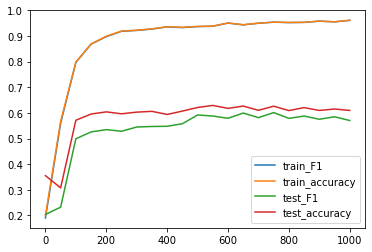

In [5]:
#metrics_tcga_metabric.head()
metrics_tcga_metabric.plot(y = ["train_F1", "train_accuracy", "test_F1", "test_accuracy"])

## Section 3: METABRIC, but with features pre-selected from TCGA BRCA

In [6]:
# Loading necessary libraries and functions
import sys
sys.path.append('../')
from main import train_model
import pandas as pd

# Setting all variables for run
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = 42 

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

COMBINER = False 
doSMOTE = True 

# Training parameters
num_epoch = 500
test_interval = 25
lr = 5e-4
weight_decay = 5e-4
dropout = 0.5
adj_parameter = 8 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
REPEATS = 1 #Integer, how many times to independently train the model
feature_extract = []

In [7]:
RUN_TITLE = "METABRIC mRNA Expression, but with TCGA BRCA features"
RUN_TITLE_SHORT = "metabric_mrna"

# pre-processed data
mrna = "../R/METABRIC/metabric_mrna_common_genes.csv"
meta_csv = "../R/METABRIC/PAM50_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_metabric.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [8]:
losses_metabric_preselected, metrics_metabric_preselected, _, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

#losses_tcga_metabric.to_csv("losses_tcga_metabric.csv")
#metrics_tcga_metabric.to_csv("metrics_tcga_metabric.csv")
#feature_tcga_metabric["lime"].to_csv("tcga_metabric_features.csv", index_label="features")

2021-05-07 16:50:01.198778 

METABRIC mRNA Expression, but with TCGA BRCA features
SEED =  42

Training...

Test: Epoch 0
Train Accuracy: 0.2094   Test ACC: 0.2578
Train F1: 0.1580         Test F1: 0.1057

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.5451              0.1456              0.0000
Basal 	           0.2000              0.1137              0.2154              0.0000
Her2 	           0.2000              0.3412              0.1547              0.0000
LumA 	           0.2000              0.0258              0.2578              1.0000
LumB 	           0.2000              0.0215              0.2265              0.0000


Test: Epoch 25
Train Accuracy: 0.5146   Test ACC: 0.5571
Train F1: 0.4917         Test F1: 0.5369

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accura


Test: Epoch 300
Train Accuracy: 0.9258   Test ACC: 0.7048
Train F1: 0.9253         Test F1: 0.7062

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9528              0.1456              0.5833
Basal 	           0.2000              0.9742              0.2154              0.6808
Her2 	           0.2000              0.9914              0.1547              0.5817
LumA 	           0.2000              0.8197              0.2578              0.9059
LumB 	           0.2000              0.8906              0.2265              0.6607


Test: Epoch 325
Train Accuracy: 0.9391   Test ACC: 0.7128
Train F1: 0.9387         Test F1: 0.7143

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

<AxesSubplot:>

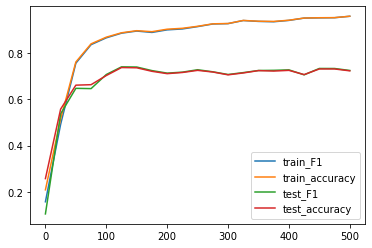

In [9]:
metrics_metabric_preselected.plot(y = ["train_F1", "train_accuracy", "test_F1", "test_accuracy"])

## Section 4: Testing on Independent Imputed Set

In this section, we will again train the model on TCGA BRCA data, but instead of training on only the single omics (gene expression) that is present in both data sets, I will use a modified METABRIC data set where the missing omics (DNA Methylation and miRNA expression) are imputed using the TCGA BRCA data. Thus, this will be a multi-omic validation.

### Imputation
First we need to impute the data.

In [18]:
mrna_file = "../R/TCGA BRCA/mrna_top1000.csv"
meth_file = "../R/TCGA BRCA/meth_top1000.csv"
mirna_file = "../R/TCGA BRCA/mirna_anova.csv"

mrna_tcga = pd.read_csv(mrna_file, index_col="patient_id")
meth_tcga = pd.read_csv(meth_file, index_col="patient_id")
mirna_tcga = pd.read_csv(mirna_file, index_col="patient_id")
mrna_tcga.columns = [x.split("|")[1] for x in mrna_tcga.columns.tolist()]

# Load metabric mrna and find if the column names match
metabric_file = "../R/METABRIC/metabric_mrna_common_genes.csv"
metabric = pd.read_csv(metabric_file, index_col="patient_id")

# Scaling data
metabric = (metabric - metabric.mean())/metabric.std() #metabric.min())/(metabric.max() - metabric.min())
mrna_tcga = (mrna_tcga - mrna_tcga.mean())/mrna_tcga.std() #mrna_tcga.min()/(mrna_tcga.max() - mrna_tcga.min()))
meth_tcga = (meth_tcga - meth_tcga.mean())/meth_tcga.std() #meth_tcga.min()/(meth_tcga.max() - meth_tcga.min()))
mirna_tcga = (mirna_tcga - mirna_tcga.mean())/mirna_tcga.std() #mirna_tcga.min()/(mirna_tcga.max() - mirna_tcga.min()))

# Common features
common = [x for x in metabric.columns.tolist() if x in mrna_tcga.columns.tolist()]

# Merging tcga data together
tcga = pd.merge(pd.merge(mrna_tcga, meth_tcga, left_index=True, right_index=True), mirna_tcga,  left_index=True, right_index=True)
datatypes = ["mrna"]*mrna_tcga.shape[1] + ["meth"]*meth_tcga.shape[1] + ["mirna"]*mirna_tcga.shape[1]

# Vertically joining tcga and metabric data; missing features have NaN values
merged_data = pd.concat([tcga, metabric], keys=["tcga", "metabric"])

In [19]:
# Imputing the missing features in metabric data set
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=50)
imputer.fit(merged_data.loc["tcga"])

metabric_imputed = imputer.transform(merged_data.loc["metabric"])
metabric_imputed = pd.DataFrame(metabric_imputed, columns = merged_data.columns, index = merged_data.loc["metabric"].index)
metabric_imputed.head()

10926      1602       585     91133      7083     56204  \
patient_id                                                               
MB-0002    -0.014999  0.394062  0.291286 -0.334824 -1.048008  0.526722   
MB-0008    -0.303583 -0.829574 -0.821169 -0.141385  0.248524  0.481390   
MB-0010     0.917399  0.390333 -0.902791  0.391926  0.897199 -0.579003   
MB-0035     1.670517  2.252454 -1.452800 -0.698280  0.324651  1.241530   
MB-0036     0.723166  2.336621  1.490107 -0.442490 -0.284127  0.191001   

               23171     85004     10411    130888  ...  hsa-mir-217  \
patient_id                                          ...                
MB-0002     1.458258  1.318898 -1.513677  1.123605  ...    -0.089832   
MB-0008    -0.507568 -0.285917 -0.502177 -1.537316  ...    -0.080471   
MB-0010     0.408938 -0.254797 -1.081950  1.270355  ...    -0.088286   
MB-0035     1.895824 -0.142129 -1.215680 -0.685873  ...    -0.016863   
MB-0036    -0.586400  1.095476 -0.830777  0.946928  ...    -0.032493   

            hsa-mir-424  hsa-mir-581  hsa-mir-483  hsa-mir-3614  hsa-mir-16-1  \
patient_id                                                                      
MB-0002        0.177222     0.226528    -0.053391     -0.143277     -0.186579   
MB-0008        0.002028    -0.112891    -0.061183      0.422170     -0.153718   
MB-0010        0.187724     0.201692    -0.053467     -0.100413     -0.082047   
MB-0035        0.154846     0.143743    -0.053276     -0.127423     -0.136289   
MB-0036       -0.066798     0.044401    -0.048578     -0.117050     -0.165032   

            hsa-mir-550a-2  hsa-mir-24-1  hsa-mir-508  hsa-mir-642a  
patient_id                                                           
MB-0002          -0.118947      0.002087    -0.149463     -0.072987  
MB-0008          -0.094877     -0.008731    -0.081193     -0.211365  
MB-0010          -0.123761      0.464171    -0.157772     -0.000955  
MB-0035          -0.148633     -0.169069    -0.102191     -0.050240  
MB-0036          -0.128575     -0.142411    -0.106682     -0.065405  

[5 rows x 2257 columns]

Now, divide the data frames up according to the list "datatypes" and then save them to individual csv files in the R/METABRIC folder and then supply them to the model to work on.

In [20]:
# Vertically joining tcga and metabric_imputed data
complete_data = pd.concat([tcga, metabric_imputed])

# Separating the omics
mask = [x=="mrna" for x in datatypes]
mrna = complete_data.loc[:, mask]

mask = [x=="meth" for x in datatypes]
meth = complete_data.loc[:, mask]

mask = [x=="mirna" for x in datatypes]
mirna = complete_data.loc[:, mask]

In [21]:
# Getting labels
meta_csv = "../R/METABRIC/PAM50_tcga_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_tcga_metabric.txt"

meta = pd.read_csv(meta_csv, index_col="patient_id")
meta = meta.reindex(index=mirna.index)
#labels.iloc[:,0].value_counts()
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}
labels = [label_dict[x] for x in meta.iloc[:,0].tolist()]


# Getting training and testing indices
patient_id = mirna.index.to_numpy()
with open(trte_partition_file, 'r') as f:
    lines = f.readlines()

tr_patient_id_list = lines[1].strip().split(',')
te_patient_id_list = lines[3].strip().split(',')
tr_idx = [np.where(patient_id == pid)[0][0] for pid in tr_patient_id_list]
te_idx = [np.where(patient_id == pid)[0][0] for pid in te_patient_id_list]
te_idx = sorted(te_idx)

In [22]:
print(all(mrna.index == meth.index))
print(all(meth.index == mirna.index))
print(all(mrna.index == meta.index))

True
True
True


In [30]:
SEED = "random"

doSMOTE = True 

# Training parameters
num_epoch = 2000
test_interval = 50
lr = 5e-4
weight_decay = 5e-4
dropout = 0.25
adj_parameter = 8 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
REPEATS = 1 #Integer, how many times to independently train the model
feature_extract = []

In [31]:
from experimental import process, train

data_list = [mrna, meth, mirna]
labels = np.array(labels)
indices = (tr_idx, te_idx)

GCN_names = ["mRNA", "meth", "mirna"]
COMBINER = False

data = process(data_list, labels, indices, SEED=SEED)

SEED =  31506


In [32]:
loss, metrics, _, _ = train(data, label_dict=label_dict, GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE,
        #RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, feature_extract=feature_extract)


2021-05-07 17:00:22.865665 


SEED =  38316

Training...

Test: Epoch 0
Train Accuracy: 0.2121   Test ACC: 0.1017
Train F1: 0.1246         Test F1: 0.0188

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0805              0.1017              1.0000
Basal 	           0.2000              0.1174              0.1667              0.0000
Her2 	           0.2000              0.8557              0.1208              0.0000
LumA 	           0.2000              0.0034              0.3630              0.0000
LumB 	           0.2000              0.0034              0.2477              0.0000


Test: Epoch 50
Train Accuracy: 0.7034   Test ACC: 0.5060
Train F1: 0.6917         Test F1: 0.4384

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
-----------------------------------------------


Test: Epoch 600
Train Accuracy: 0.9315   Test ACC: 0.7140
Train F1: 0.9305         Test F1: 0.7089

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9497              0.1017              0.4257
Basal 	           0.2000              0.9933              0.1667              0.7100
Her2 	           0.2000              0.9933              0.1208              0.5750
LumA 	           0.2000              0.7987              0.3630              0.8890
LumB 	           0.2000              0.9228              0.2477              0.6463


Test: Epoch 650
Train Accuracy: 0.9322   Test ACC: 0.7064
Train F1: 0.9311         Test F1: 0.6953

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  


Test: Epoch 1200
Train Accuracy: 0.9322   Test ACC: 0.7221
Train F1: 0.9311         Test F1: 0.7173

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9564              0.1017              0.4010
Basal 	           0.2000              0.9899              0.1667              0.7130
Her2 	           0.2000              0.9933              0.1208              0.6667
LumA 	           0.2000              0.7987              0.3630              0.8821
LumB 	           0.2000              0.9228              0.2477              0.6524


Test: Epoch 1250
Train Accuracy: 0.9389   Test ACC: 0.7160
Train F1: 0.9378         Test F1: 0.7119

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	


Test: Epoch 1800
Train Accuracy: 0.9275   Test ACC: 0.6888
Train F1: 0.9264         Test F1: 0.6743

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9295              0.1017              0.3267
Basal 	           0.2000              0.9933              0.1667              0.7372
Her2 	           0.2000              1.0000              0.1208              0.5083
LumA 	           0.2000              0.8020              0.3630              0.9639
LumB 	           0.2000              0.9128              0.2477              0.4898


Test: Epoch 1850
Train Accuracy: 0.9383   Test ACC: 0.7180
Train F1: 0.9375         Test F1: 0.7099

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	

<AxesSubplot:>

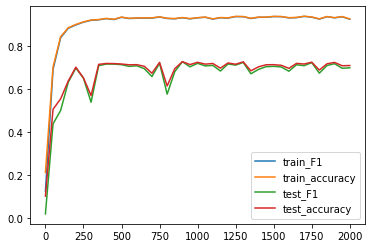

In [33]:
metrics.plot(y = ["train_F1", "train_accuracy", "test_F1", "test_accuracy"])